In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Read the data set.
data=pd.read_csv("hw_2_stops.csv")

### Solutions to Question 1)

In [3]:
#a) b) c) Let's complete these three parts together by different orders. 

# Let's take "found.weapon" as target variable. And take subset : suspected.crime=="cpw"
# For feature space, lets use features from "suspect.race" to "time.period". We must get rid of
#all those features which were recorded after stop such as "fund.gun","arrested","force." and etc.

#c) take the subset:
data=data[data.loc[:,"suspected.crime"]=='cpw']
data=data.dropna()

#b) Prepare target variable and feature space:
Y=data.loc[:,"found.weapon"]

#Get the features space and make dummy variables. 
X=data.loc[:,"suspect.race":"time.period"]
X=pd.get_dummies(X)

#a)Split data set to training and testing data:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(
    X, Y, test_size=0.25, random_state=2999)

In [11]:
#d) Train the Random Forest model, and predict the probability of "weapon found" for testing set and then save the result to X_test
from sklearn.ensemble import RandomForestClassifier as RFC
rf = RFC(n_estimators=1000, n_jobs=4, min_samples_split=10)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
#i) Select two features and save them with the result. Let's choose "age" and "precinct"
result=X_test.loc[:,['suspect.age','precinct']]
result=pd.concat((Y_test,result),axis=1)
result['pred_prob']=rf.predict_proba(X_test)[:,1]

In [13]:
result.head()

,found.weapon,suspect.age,precinct,pred_prob
67338,False,19,105,0.057416
276424,False,25,94,0.038511
1026518,False,33,81,0.009288
404269,False,22,43,0.003988
543280,False,23,43,0.046766


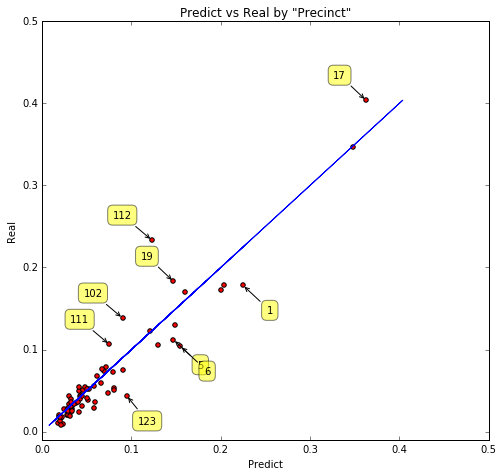

In [36]:
#For precinct:
precinct=list(result.loc[:,"precinct"].unique())
precinct.sort()

target=[]
predict=[]
for i in precinct:
    temp=result[result.loc[:,'precinct']==i]
    target.append(np.mean(temp.loc[:,'found.weapon']))
    predict.append(np.mean(temp.loc[:,'pred_prob']))

plt.figure(figsize=(8,7.5))
plt.scatter(predict,target,c="r")
plt.title('Predict vs Real by "Precinct"')
plt.xlabel("Predict")
plt.ylabel("Real")
plt.xlim(0,0.5)
plt.ylim(-0.01,0.5)
plt.plot(target,target,'-b')

#Let's label the precincts for which our model does not work well.
for label, x, y in zip(precinct, predict, target):
    if x-y>0.03:
        
        plt.annotate(
            label, 
            xy = (x, y), xytext = (30, -30),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    if x-y<-0.025:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

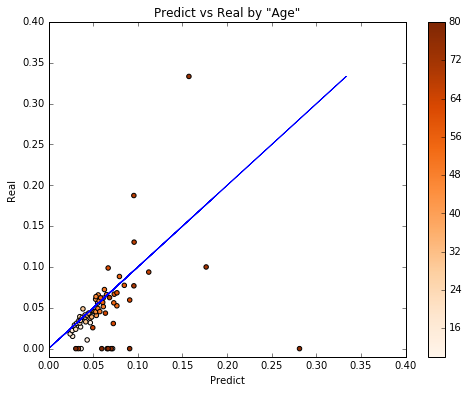

In [37]:
#For age:
age=list(result.loc[:,"suspect.age"].unique())
age.sort()

target=[]
predict=[]
for i in age:
    temp=result[result.loc[:,'suspect.age']==i]
    target.append(np.mean(temp.loc[:,'found.weapon']))
    predict.append(np.mean(temp.loc[:,'pred_prob']))
plt.figure(figsize=(8,6))
plt.scatter(predict,target,c=age, cmap=plt.cm.Oranges)
plt.colorbar()
plt.title('Predict vs Real by "Age"')
plt.xlabel("Predict")
plt.ylabel("Real")
plt.xlim(0,0.4)
plt.ylim(-0.01,0.4)
plt.plot(target,target,'-b')

plt.show()

#### ii)
(1) I set "found.weapon" as my target variable and use all the features from "suspect.age" to "time.period" as my feature space. We need to make sure get rid of the features which are recorded after stop.

(2) I restrict my data set to : suspected.crime=="cpw". 

(3) Then, I split this data set to training and testing sets by ratio 3:1.

(4) We train our model Random Forests classifier on our training set. I set random trees =1000, min_samples_split=10. These hyperparameters could be set by cross validation in a more rigorous way.

(5) After training, we can predict the probability of "found.weapon" on our testing set. Then I choose "age" and "Precinct" two categorical features to report our average predicted vs real probability. From the plots, we see the our prediction is pretty well for different Precincts. And we marked the areas for which results are less significant. As to "Age", we see the results are quite significant for junior and middle age people. However, for those very dark points(senior people), the results are somehow biased.

## Solutions to Question 2)

In [ ]:
#Part a),b),c) are same from question 1.

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs

In [39]:
# i) Train the model for different level of simplicity and plot AUC
real=np.array(Y_test.apply(int))
AUC=[]
for i in range(2,50,2):    
    rf = DTC(max_leaf_nodes=i)
    rf.fit(X_train, Y_train)
    pred=rf.predict_proba(X_test)[:,1]
    AUC.append(rs(real,pred))
    print rs(real,pred)

0.600817057584
0.683439867034
0.684220089624
0.684682160291
0.69918024029
0.699295961002
0.733455920615
0.733595339766
0.73363511876
0.780469872448
0.781889970696
0.781927271655
0.782760691982
0.782861526694
0.782909246666
0.78298542848
0.788495545443
0.793231818683
0.793338949266
0.808398867547
0.808406983411
0.812110553047
0.812098794233
0.812074831984


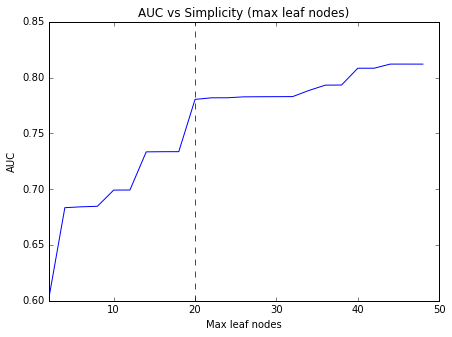

In [42]:
plt.figure(figsize=(7,5))
plt.plot(range(2,50,2),AUC)
plt.xlabel("Max leaf nodes")
plt.ylabel("AUC")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.axvline(20,color='r',linestyle='--')
plt.xlim(2,50)
plt.show()

In [46]:
#ii)
# First step, let's pick 3 most important features for plot.
Feature_importance=pd.DataFrame([list(X_test.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort(columns="importance",ascending=False).iloc[:3,:]

D:\Users\ling\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,variables,importance
6,stopped.bc.object,0.36962
44,location.housing_transit,0.284818
13,precinct,0.085626


In [4]:
#Let's generate our new training and testing model by these three features.
X_train_simple=X_train.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]
X_test_simple=X_test.loc[:,["stopped.bc.object","location.housing_transit","precinct"]]

In [19]:
#Let's see the performance of this simple model:
real=np.array(Y_test.apply(int))
rf = DTC(max_leaf_nodes=20) # Here of course we could remove this limit. But you could have a very 
                             #big graph for next question.
rf.fit(X_train_simple, Y_train)
pred=rf.predict_proba(X_test_simple)[:,1]
print("The AUC score for this simple model with 3 features is : {}".format(rs(real,pred)))

The AUC score for this simple model with 3 features is : 0.727121400292


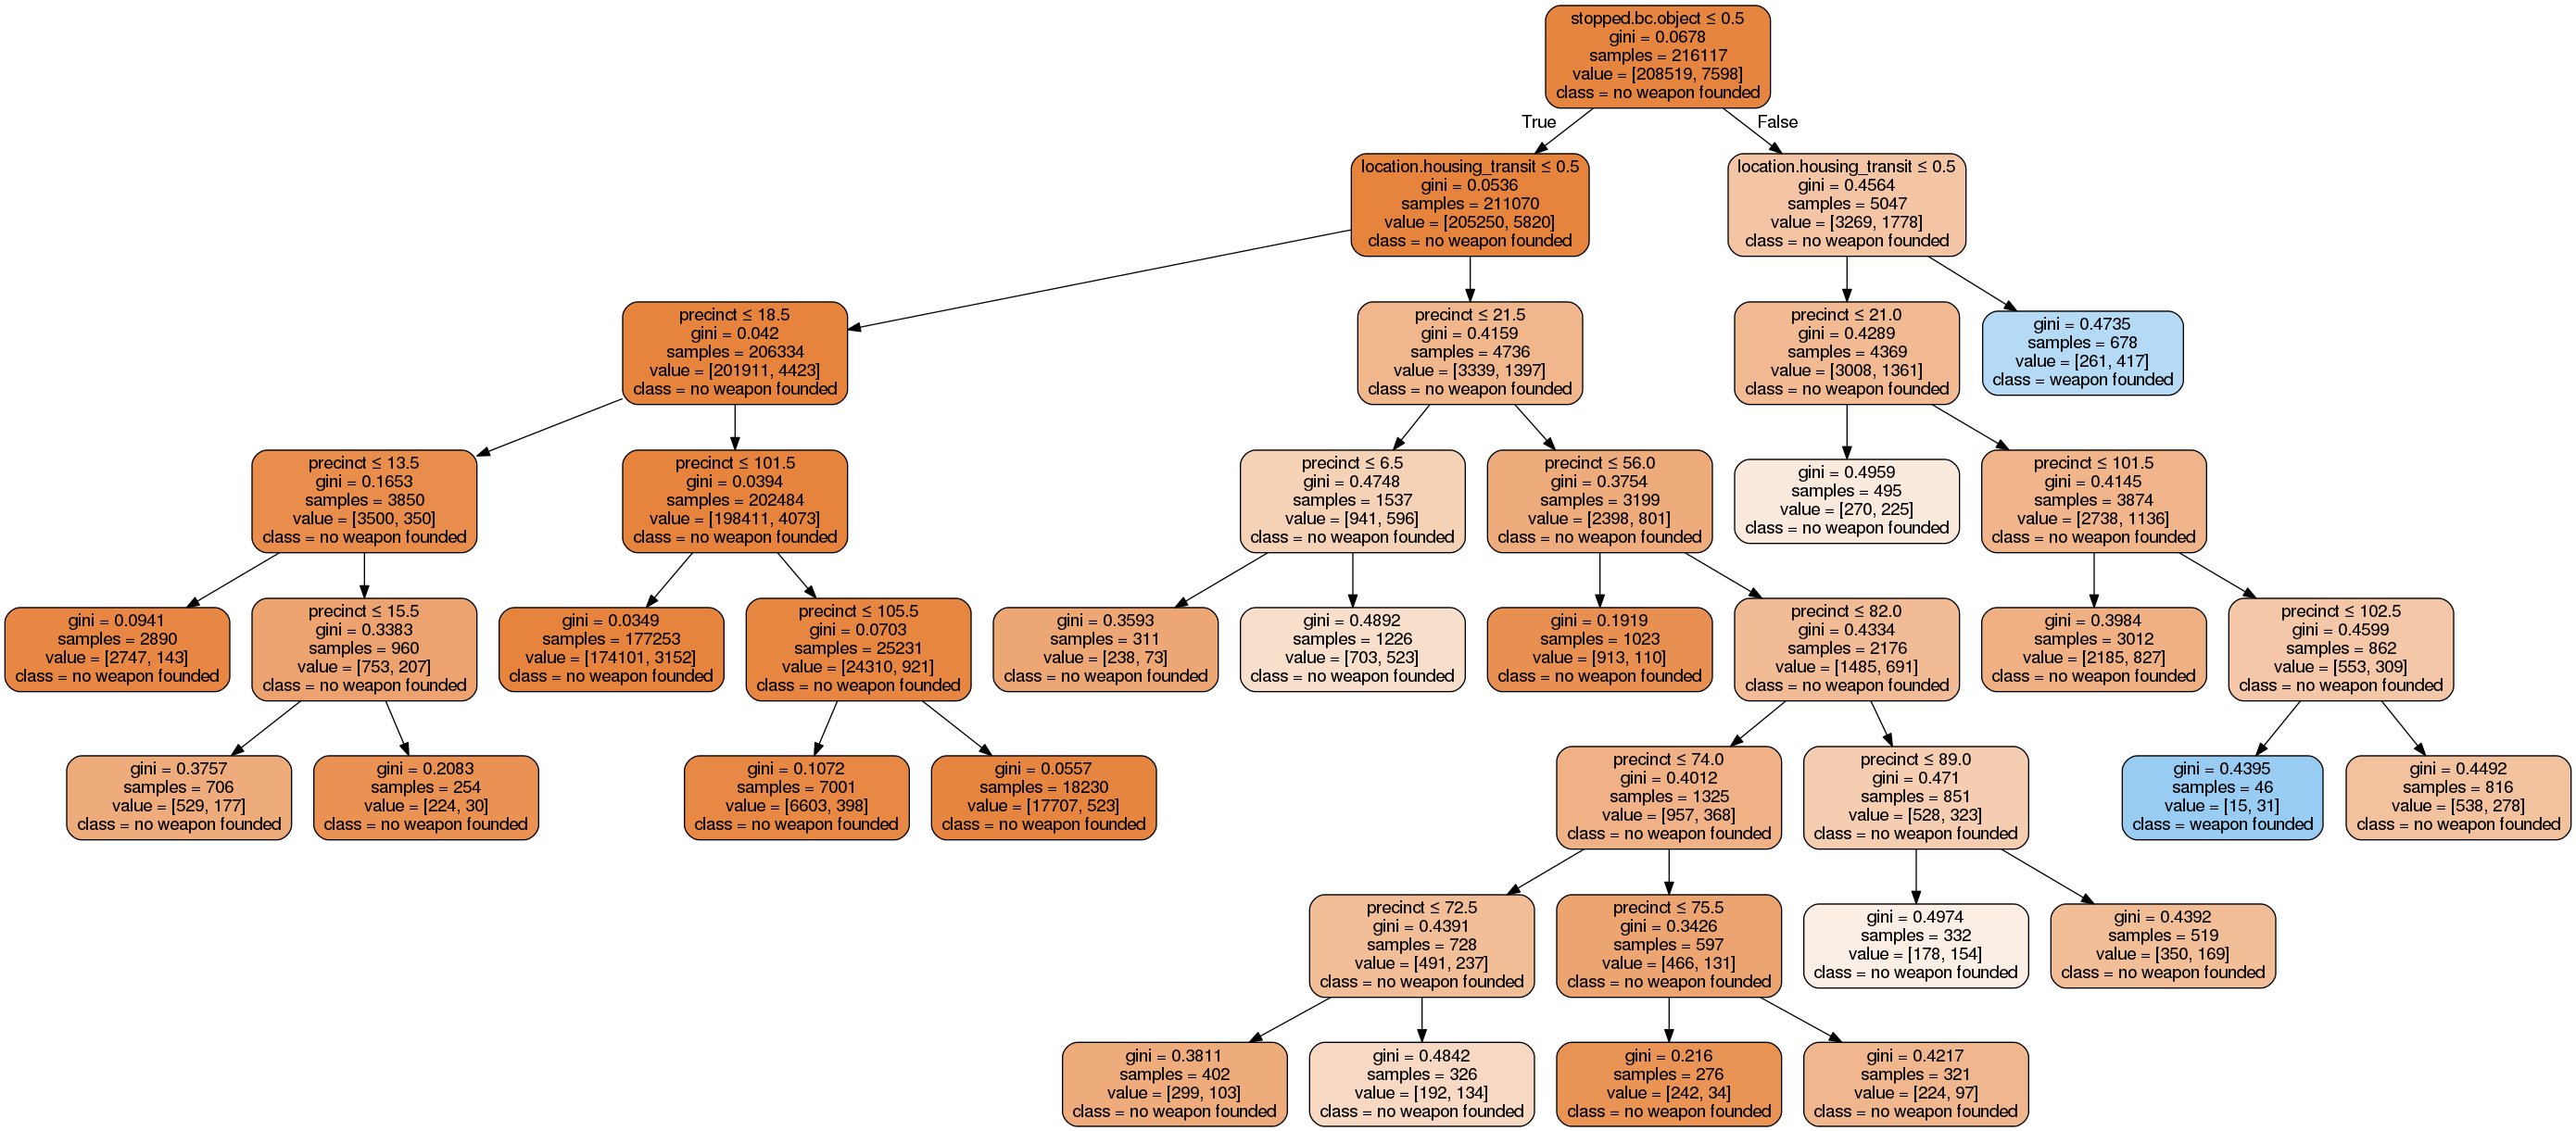

In [21]:
#Let's draw the plot as required.
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydot
dot_data = StringIO()  
tree.export_graphviz(rf, out_file=dot_data,  
                         feature_names=["stopped.bc.object","location.housing_transit","precinct"],  
                         class_names=["no weapon founded","weapon founded"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

#### iii)

We use exactly the same feature space and target variable as in question 1. Also we use the same subset and same split.

Then, we tested the AUC score for models with different simplicity. Here I use "max leaf nodes" as the measure for simplicity. From plot, we see 20 is high enough for us to hold the significant high level of AUC score. 

In the end, we use the feature importance function of decision trees package to select the most 3 important features, and train the model on the data set of these three features and we see we could get 0.72 AUC score for prediction of "weapon founded"(target variable). And we plot the decision tree graph as required.